Accuracy with stop words (full vocabulary): 0.3644
Accuracy without stop words (full vocabulary): 0.3525

Vocabulary Size: 10
Accuracy with stop words (limited vocabulary): 0.0982
Accuracy without stop words (limited vocabulary): 0.1077
Accuracy with TF-IDF weighting (limited vocabulary): 0.0840
Accuracy with stop words (full vocabulary): 0.3644
Accuracy without stop words (full vocabulary): 0.3525

Vocabulary Size: 100
Accuracy with stop words (limited vocabulary): 0.2341
Accuracy without stop words (limited vocabulary): 0.1664
Accuracy with TF-IDF weighting (limited vocabulary): 0.2712
Accuracy with stop words (full vocabulary): 0.3644
Accuracy without stop words (full vocabulary): 0.3525

Vocabulary Size: 1000
Accuracy with stop words (limited vocabulary): 0.3586
Accuracy without stop words (limited vocabulary): 0.2740
Accuracy with TF-IDF weighting (limited vocabulary): 0.5223
Accuracy with stop words (full vocabulary): 0.3644
Accuracy without stop words (full vocabulary): 0.3525



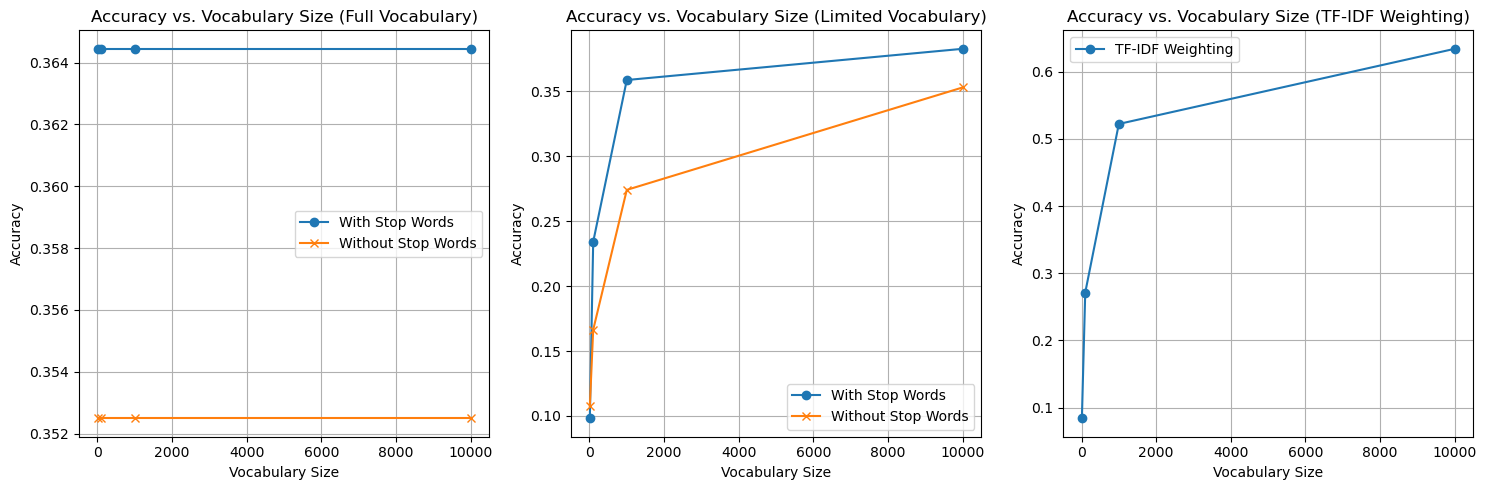

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Function to fetch and preprocess data
def fetch_and_preprocess_data(max_features=None, use_stop_words=True,transformer=False):
    # Fetch the 20 Newsgroups dataset
    data_train = fetch_20newsgroups(subset='train')
    data_test = fetch_20newsgroups(subset='test')

    # Initialize CountVectorizer with specified parameters
    vectorizer = CountVectorizer(max_features=max_features, stop_words="english" if use_stop_words else None)

    # Vectorize Training data
    X_train = vectorizer.fit_transform(data_train.data)

    # Vectorize Testing data
    X_test = vectorizer.transform(data_test.data)

    # Apply TF-IDF weighting to the feature vectors
    if transformer: 
        tfidf_transformer = TfidfTransformer()
        X_train_tfidf = tfidf_transformer.fit_transform(X_train)
        X_test_tfidf = tfidf_transformer.transform(X_test)
        return X_train_tfidf, data_train.target, X_test_tfidf, data_test.target
    
    return X_train, data_train.target, X_test, data_test.target

# Function to train and evaluate KNN classifier
def train_and_evaluate_knn(X_train, y_train, X_test, y_test):
    knn_classifier = KNeighborsClassifier()
    knn_classifier.fit(X_train, y_train)
    predictions = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    return accuracy


# Lists to store accuracy values
accuracies_with_stop_words_full = []
accuracies_without_stop_words_full = []
accuracies_with_stop_words_limited = []
accuracies_without_stop_words_limited = []
accuracies_tfidf = []

# Vocabulary sizes to experiment with
vocab_sizes = [10, 100, 1000, 10000]

for vocab_size in vocab_sizes:
    
    
    # Train and evaluate KNN classifier with using stop words for full vocabulary
    X_train, y_train, X_test, y_test = fetch_and_preprocess_data(max_features=None)
    accuracy_with_stop_words_full = train_and_evaluate_knn(X_train, y_train, X_test, y_test)
    accuracies_with_stop_words_full.append(accuracy_with_stop_words_full)
    print(f"Accuracy with stop words (full vocabulary): {accuracy_with_stop_words_full:.4f}")

    # Train and evaluate KNN classifier without using stop words for full vocabulary
    X_train, y_train, X_test, y_test = fetch_and_preprocess_data(max_features=None, use_stop_words=False)
    accuracy_without_stop_words_full = train_and_evaluate_knn(X_train, y_train, X_test, y_test)
    accuracies_without_stop_words_full.append(accuracy_without_stop_words_full)
    print(f"Accuracy without stop words (full vocabulary): {accuracy_without_stop_words_full:.4f}")
    
    print(f"\nVocabulary Size: {vocab_size}")

    # Train and evaluate KNN classifier with using stop words for limited vocabulary
    X_train, y_train, X_test, y_test = fetch_and_preprocess_data(max_features=vocab_size)
    accuracy_with_stop_words_limited = train_and_evaluate_knn(X_train, y_train, X_test, y_test)
    accuracies_with_stop_words_limited.append(accuracy_with_stop_words_limited)
    print(f"Accuracy with stop words (limited vocabulary): {accuracy_with_stop_words_limited:.4f}")

    # Train and evaluate KNN classifier without using stop words for limited vocabulary
    X_train, y_train, X_test, y_test = fetch_and_preprocess_data(max_features=vocab_size, use_stop_words=False)
    accuracy_without_stop_words_limited = train_and_evaluate_knn(X_train, y_train, X_test, y_test)
    accuracies_without_stop_words_limited.append(accuracy_without_stop_words_limited)
    print(f"Accuracy without stop words (limited vocabulary): {accuracy_without_stop_words_limited:.4f}")

    # Train and evaluate KNN classifier with TF-IDF weighting
    X_train_tfidf, y_train, X_test_tfidf, y_test = fetch_and_preprocess_data(max_features=vocab_size, transformer=True)
    accuracy_tfidf = train_and_evaluate_knn(X_train_tfidf, y_train, X_test_tfidf, y_test)
    accuracies_tfidf.append(accuracy_tfidf)
    print(f"Accuracy with TF-IDF weighting (limited vocabulary): {accuracy_tfidf:.4f}")
    print("======================================================")
 
# Plotting
plt.figure(figsize=(15, 5))

# Plot for full vocabulary
plt.subplot(1, 3, 1)
plt.plot(vocab_sizes, accuracies_with_stop_words_full, label='With Stop Words', marker='o')
plt.plot(vocab_sizes, accuracies_without_stop_words_full, label='Without Stop Words', marker='x')
plt.xlabel('Vocabulary Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Vocabulary Size (Full Vocabulary)')
plt.legend()
plt.grid(True)

# Plot for limited vocabulary
plt.subplot(1, 3, 2)
plt.plot(vocab_sizes, accuracies_with_stop_words_limited, label='With Stop Words', marker='o')
plt.plot(vocab_sizes, accuracies_without_stop_words_limited, label='Without Stop Words', marker='x')
plt.xlabel('Vocabulary Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Vocabulary Size (Limited Vocabulary)')
plt.legend()
plt.grid(True)

# Plot for TF-IDF weighting
plt.subplot(1, 3, 3)
plt.plot(vocab_sizes, accuracies_tfidf, label='TF-IDF Weighting', marker='o')
plt.xlabel('Vocabulary Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Vocabulary Size (TF-IDF Weighting)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
